# Gráficos Física Experimental

## Este material tem a intenção de fornecer subsídios para que os alunos da disciplina de Física Experimental I possam fazer os gráficos requeridos nos [roteiros](https://sites.google.com/site/econofisico/home/materiais-didaticos/laboratorio-de-fisica-i-e-a) utilizando o python. Leia com bastante atenção tudo que estiver escrito em preto negrito. Nos códigos, tudo que estiver escrito após o símbolo # são comentários que podem ser úteis ao entendimento.  Para que tudo funcione bem, selecione, uma a uma, todas as células deste notebook clicando sobre elas (suas bordas ficam verdes) e depois pressionando o botão "play" no canto superior esquerdo. Faça isso começando da primeira até a última célula. Apenas depois edite alguma célula com os resultados dos experimentos.

### As células de 1 a 4 servem para construir um gráfico com barras de erro com os dados como dispostos na célula 2. Pode ser utilizado para fazer os gráficos da prática 2 por exemplo. A célula 4 serve para obter os coeficientes angular e linear da reta obtida na célula 3;

### As células 5 a 8 representam outro exemplo parecido com o que foi feito nas células 1 a 4;

### As células de 9 a 11 realizam o exemplo da apostila na página 25;

### As células 12 a 15 fazem o gráfico em escala linear de dados contidos no arquivo "dados4.txt". Diferentemente das células anteriores, onde os dados eram digitados diretamente nas células, agora temos os dados em um arquivo separado. Leia cuidadosamente as instruções em negrito escritas imediatamente antes da célula 12 para maiores informações. Esta parte pode (e deve) ser utilizada para fazer o gráfico em escala linear da prática 3. Maneiras de estimar a gravidade $g$ estão incluidas;

### As células 16 a 18 são úteis para fazer um gráfico em escala loglog utilizando a técnica de linearização, como solicitado na prática 3. Servem também ao próposito de estimar a aceleração da gravidade $g.$ Um bom material para aprender mais sobre linearização está [aqui](http://fisica.ufpr.br/graff/linearizacao%20grafica.pdf). Um bom vídeo que ensina fazer gráficos em papel milimetrado (que obviamente não será necessário se fizerem os gráficos utilizando este notebook de python) está [aqui](https://www.youtube.com/watch?v=zJ8lWj5I0dk). Para entender o que é uma escala logarítmica, tente [este](https://www.youtube.com/watch?v=bXzgwh_M0Kw). Aproveitando, seguem bons vídeos para aprender a usar o [paquímetro](https://www.youtube.com/watch?v=OOmvuzXMY2M) e o [micrômetro](https://www.youtube.com/watch?v=-Z5N7GcNViI).

#### A primeira célula a seguir aciona algumas bibliotecas do python. Para rodar a célula, clique na célula e depois no botão "Play" na parte superior esquerda . ####

In [1]:
# CÉLULA 1
# O caracter # permite a introdução de comentários no código. Eles não são levados em consideração quando o computador executa a célula.
import numpy as np
import matplotlib.pyplot as plt
from pylab import*

#### A célula seguinte aloca na memória os dados do experimento. Atenção: _Esta é a única célula que precisa ser editada!!_  ####
###### Os números utilizados são exemplos arbitrários. ######
##### Substituam os valores utilizados aqui pelos valores obtidos nos experimentos realizados por vocês. #####

In [2]:
# CÉLULA 2
x = np.array([0.38, 0.64, 0.91, 1.26, 1.41, 1.66, 1.90, 2.18])              # Dados do eixo X
dx = np.array([0.038, 0.064, 0.091, 0.126, 0.141, 0.166, 0.190, 0.218])     # Erros dos dados do eixo X
y = np.array([1.4, 1.65, 3.0, 3.95, 4.3, 5.20, 6.85, 7.4])                  # Dados do eixo Y
dy = np.array([ 0.4, 0.5, 0.4, 0.5, 0.6, 0.5, 0.5, 0.4])                    # Erros dos dados do eixo Y

#### A próxima célula constrói o gráfico com as barras de erro em X e em Y. A reta que melhor se ajusta aos dados também é apresentada:

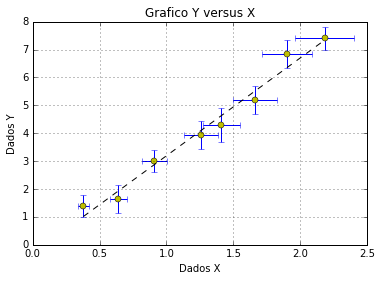

In [3]:
# CÉLULA 3
#fig, ax1 = plt.subplots()
#ax1.plot(x, y, c='b', marker='o', markeredgewidth=0, linewidth=0, markersize=3)
#fig, ax1 = plt.subplots()
plot(x, y, c='b', marker='o', markeredgewidth=0, linewidth=0, markersize=3)
errorbar(x, y, yerr=dy, xerr=dx, linestyle=' ', c= 'b')
m,b = polyfit(x, y, 1) 
plot(x, y, 'yo', x, m*x+b, '--k') 
plt.xlabel("Dados X")
plt.ylabel("Dados Y")
plt.title("Grafico Y versus X")
plt.grid()
plt.show()

#### A célula seguinte calcula, dentre outras coisas, a inclinação da reta (slope) e o coeficiente linear (intercept). Vejam que a reta possui uma inclinação 3.51 e intercepta o eixo Y no ponto -0.32. ####

In [4]:
# CÉLULA 4
from scipy.stats import linregress
x = [0.38, 0.64, 0.91, 1.26, 1.41, 1.66, 1.90, 2.18]
y = [1.4, 1.65, 3.0, 3.95, 4.3, 5.20, 6.85, 7.4]
linregress(x,y) #x and y are arrays or lists.

LinregressResult(slope=3.5093680269976217, intercept=-0.31710817489442622, rvalue=0.98935239128539765, pvalue=2.9937920608182072e-06, stderr=0.21075805581432547)

### Exemplo envolvendo tempos e posições:

##### Inserção dos pacotes utilizados (uma vez incluídos, como na primeira célula deste notebook, não precisamos fazê-lo novamente. O faremos aqui por completeza):

In [5]:
# CÉLULA 5
import numpy as np
import matplotlib.pyplot as plt
from pylab import*

##### Digitação dos dados:

In [6]:
# CÉLULA 6
t = np.array([1.0, 2.5, 6.0, 8.0, 10.0, 13.5, 16.0])           # tempo
errot = np.array([0.40, 0.42, 0.45, 0.41, 0.46, 0.45, 0.44])   # erros no tempo
x = np.array([105, 150, 240, 290, 340, 430, 500])              # posição ou deslocamento
errox = np.array([15, 16, 15, 16, 17, 14, 15])                 # erros no deslocamento

##### Fazendo o grafico:

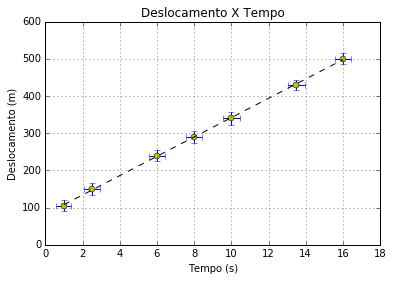

In [7]:
# CÉLULA 7
fig, ax1 = plt.subplots()
ax1.plot(t, x, c='b', marker='o', markeredgewidth=0, linewidth=0, markersize=3)
ax1.errorbar(t, x, yerr=errox, xerr=errot, linestyle=' ', c= 'b')
m,b = polyfit(t, x, 1) 
plot(t, x, 'yo', t, m*t+b, '--k') 
plt.xlabel("Tempo (s)")
plt.ylabel("Deslocamento (m)")     # A utilização da palavra "Posição" induz erro devido aos caracteres tilda e cedilha.
plt.title("Deslocamento X Tempo")
plt.grid()
plt.show()

##### Fazendo a regressão linear para determinar os coeficiente angular (slope) e linear (intercept). No contexto de um gráfico Posição X Tempo, o coeficiente angular representa a velocidade e o coeficiente linear representa a posição inicial. Portanto a velocidade estimada é de 29.98 metros por segundo (m/s) e a posição inicial é de 82 metros (m), aproximadamente.

In [8]:
# CÉLULA 8
from scipy.stats import linregress
t = [1.0,2.5,6.0,8.0,10.0,13.5,16.0]
v = [105,150,240,290,340,430,500]
linregress(t,v) #x and y are arrays or lists.

LinregressResult(slope=25.978731784167, intercept=82.030326900354424, rvalue=0.99984163861411002, pvalue=6.0609434165079382e-10, stderr=0.20678744871021881)

### Exemplo da apostila página 25:

In [9]:
# CÉLULA 9
t = np.array([3,5,7,9])
errot = np.array([0.01,0.10,0.20,0.70])
v = np.array([2.5,3,4,5])
errov = np.array([0.5,0.3,0.5,0.6])

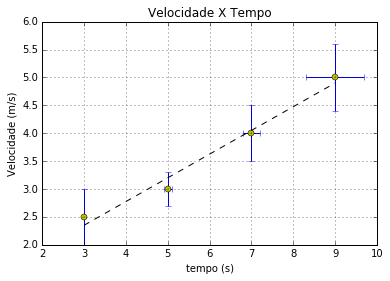

In [10]:
# CÉLULA 10
fig, ax1 = plt.subplots()
ax1.plot(t, v, c='b', marker='o', markeredgewidth=0, linewidth=0, markersize=3)
ax1.errorbar(t, v, yerr=errov, xerr=errot, linestyle=' ', c= 'b')
m,b = polyfit(t, v, 1) 
plot(t, v, 'yo', t, m*t+b, '--k') 
plt.xlabel("tempo (s)")
plt.ylabel("Velocidade (m/s)")
plt.title("Velocidade X Tempo")
plt.grid()
plt.show()

#### A seguir obtemos novamente o coeficiente angular, que no caso do gráfico Velocidade X Tempo é a aceleração, e o coeficiente linear, representando a velocidade inicial. Ao clicar em "Run" ou "Play" obtemos os resultados: aceleração = $0.42$ $m/s^2$ e velocidade inicial = $1.075$ $m/s.$

In [11]:
# CÉLULA 11
from scipy.stats import linregress
t = [3,5,7,9]
v = [2.5,3,4,5]
linregress(t,v) #x and y are arrays or lists.

LinregressResult(slope=0.42499999999999999, intercept=1.0750000000000002, rvalue=0.9897782665572894, pvalue=0.010221733442710598, stderr=0.043301270189221829)

## Gráficos em escala linear e logarítmica

#### Gráfico em escala linear para altura em função do tempo, $y(t) = \frac{1}{2}gt^2+v_0t+h_0.$ Os dados estão no arquivo "dados4.txt". Para fazer o _upload_ do arquivo, clique em "+New" no canto superior esquerdo da tela  e depois em "Drop files to upload". Atenção: Se não souber o que está fazendo, não edite os códigos a seguir.  Edite apenas o arquivo "dados4.txt" para colocar seus dados.  Para isso, depois de feito o _upload_, clique em "Files" e depois em "dados4.txt". Após o arquivo abrir, edite-o colocando os seus dados.

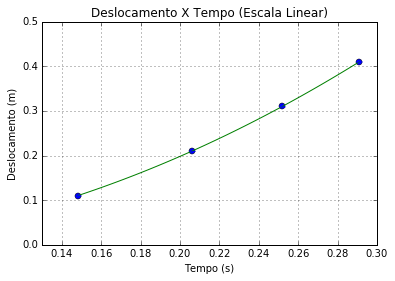

4.42685890957
0.153723982507
-0.00967715051628


In [12]:
# CÉLULA 12
import numpy as np
import matplotlib.pyplot as plt
import pylab

data = loadtxt("dados4.txt")      # Obtendo os dados do arquivo de nome "dados4.txt".  
#xdata,ydata,yerror = data[:,0],data[:,1],data[:,2]
#xdata,ydata = zip(*sorted(zip(xdata,ydata))) # sorts the two lists after the xdata    

#xd,yd = log10(xdata),log10(ydata)
# Obtendo os valores de t and y 
t = data[:,0]
y = data[:,1]
erroy = data[:,2]

# Calculando polinômio de grau dois (parábola da forma y(x) = ax^2 + bx + c, que pode representar y(t) = 1/2 gt^2 + vt + h)
z = (a,b,c) = np.polyfit(t, y, 2)
f = np.poly1d(z)


# calcular novos t's e y's
t_new = np.linspace(t[0], t[-1], 50)
y_new = f(t_new)

plt.plot(t,y,'o', t_new, y_new)
plt.errorbar(t, y, yerr=erroy, linestyle=' ', c= 'b')
plt.xlim([t[0]-1, t[-1] + 1 ])
plt.title("Deslocamento X Tempo (Escala Linear)")
plt.xlabel("Tempo (s)")
pylab.xlim([0.13,0.3])     # Estabelece o intervalo de apresentação da escala x
plt.ylabel("Deslocamento (m)")
pylab.ylim([0,0.5])        # Estabelece o intervalo de apresentação da escala y
plt.grid()
plt.show()

# Mostrar os valores dos coeficientes "a", "b" e "c" em y(t) = at^2 + bt + c
print(a)      # Coeficiente "a" da parábola y(x) = ax^2 + bx + c. Comparando com y(t) = 1/2 gt^2 +vt +h, temos que a = g/2 (g = aceleração da gravidade).
print(b)      # Coeficiente "b" da parábola y(x) = ax^2 + bx + c. Comparando com y(t) = 1/2 gt^2 +vt +h, temos que b = v (v = velocidade inicial).
print(c)      # Coeficiente "c" da parábola y(x) = ax^2 + bx + c. Comparando com y(t) = 1/2 gt^2 +vt +h, temos que c = h (h = altura inicial).

In [14]:
# CÉLULA 13
print(a)     # Como a = g/2, temos que a aceleração da gravidade é 2 * 4.42 = 8.84 m/s^2, aproximadamente. Claro que não se trata da Terra!!

4.42685890957


In [15]:
# CÉLULA 14
print(b)     # Como b = v, temos que a velocidade inicial é aproximadamente 0.00 m/s.

0.153723982507


In [17]:
# CÉLULA 15
print(c)     # Como c = h, temos que a altura inicial é aproximadamente -0.01 m.

-0.00967715051628


#### Gráfico em escala loglog. Vamos considerar que $h_0=0=v_0.$ Portanto $y(t)=\frac{1}{2}gt^2$ (ainda uma parábola). Tomando o log de ambos os lados: $\log{[y(t)]}=\log{\left(\frac{1}{2}gt^2\right)},$ ou seja, $\log{\left[y(t)\right]}=\log{\left(\frac{g}{2}\right)+2\log{(t)}}.$ Se fizermos $\log{[y(t)]}\equiv Y(T),$ $\log{\left(\frac{g}{2}\right)}\equiv A$ e $2\log{(t)}\equiv T,$ podemos escrever $Y(T)=A+T,$ uma reta. Na escala onde tomamos o logaritmo tanto de $t$ como de $y,$ o que era uma parábola vira uma reta. Se conseguirmos estimar o coeficiente linear desta reta, o parâmetro $A,$ conseguiremos estimar a aceleração da gravidade, já que $A=\log{\left(\frac{g}{2}\right)}.$ Assim, $g=2\times10^A.$

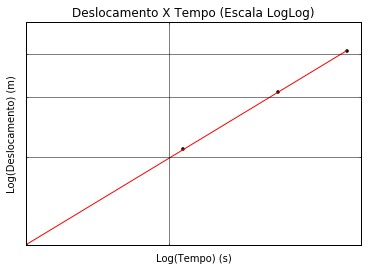

1.94552557934
0.656130980944


In [27]:
# CÉLULA 16
from scipy import polyfit
data = loadtxt("dados4.txt")
tdata, ydata = data[:,0], data[:,1]
tdata, ydata = zip(*sorted(zip(tdata,ydata))) # Ordenar as duas listas    

td, yd = log10(tdata), log10(ydata)
polycoef = polyfit(td, yd, 1)
yfit = 10**( polycoef[0]*td + polycoef[1] )

plt.loglog(tdata, ydata,'.k', tdata, yfit,'-r')
plt.title("Deslocamento X Tempo (Escala LogLog)")
plt.xlabel("Log(Tempo) (s)")
pylab.xlim([0,0.3])     # Estabelece o intervalo de apresentação da escala x. Pode ser útil editar.
plt.ylabel("Log(Deslocamento) (m)")
pylab.ylim([0,0.5])     # Estabelece o intervalo de apresentação da escala y. Pode ser útil editar.
plt.grid(True,which="both",ls="-")
plt.show()
print(polycoef[0])     # O valor do coeficiente angular será escrito logo após o gráfico
print(polycoef[1])     # O valor do coeficiente linear será escrito logo após o gráfico

In [38]:
# CÉLULA 17
A=polycoef[1]     # Coeficiente linear da reta Y = A + 2T

In [41]:
# CÉLULA 18
g=2*pow(10,A);round(g,2)     # Obtenção da aceleração da gravidade g

9.06